## Load Data

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os

In [2]:
try:
    table = pd.read_pickle("data/table.pkl")
except:
    table = pd.read_excel("data/association_table_corrected_index.xlsx")
    table.to_pickle("data/table.pkl")

In [3]:
from transformer import Event
from subsampler import balanced_subsampler

NUMBER_OF_SAMPLES_PER_EVENT = 20

table = Event().fit_transform(table)


## Enrich data

In [4]:
table["Event start"]

0         2006-05-23 20:39:27.060000+00:00
1         2006-05-23 20:39:59.960000+00:00
2         2006-05-23 22:37:52.910000+00:00
3         2006-05-23 22:44:09.410000+00:00
4         2006-05-23 22:46:58.440000+00:00
                        ...               
124869    2011-10-10 13:45:13.080000+00:00
124870    2011-10-10 19:07:34.050000+00:00
124871    2011-10-10 19:20:48.130000+00:00
124872    2011-11-10 01:08:50.090000+00:00
124873    2011-11-10 13:36:47.390000+00:00
Name: Event start, Length: 124874, dtype: object

In [5]:
dum = pd.get_dummies(table.set_index(pd.DatetimeIndex(table["Event start"])).event)

In [7]:
dum

,EXP,HIB,LP,PIS,TOR,TR,VT
Event start,,,,,,,
2006-05-23 20:39:27.060000+00:00,0,0,1,0,0,0,0
2006-05-23 20:39:59.960000+00:00,0,0,1,0,0,0,0
2006-05-23 22:37:52.910000+00:00,0,0,0,0,0,1,0
2006-05-23 22:44:09.410000+00:00,0,0,1,0,0,0,0
2006-05-23 22:46:58.440000+00:00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
2011-10-10 13:45:13.080000+00:00,0,0,1,0,0,0,0
2011-10-10 19:07:34.050000+00:00,0,0,1,0,0,0,0
2011-10-10 19:20:48.130000+00:00,0,0,1,0,0,0,0


<AxesSubplot:xlabel='Event start'>

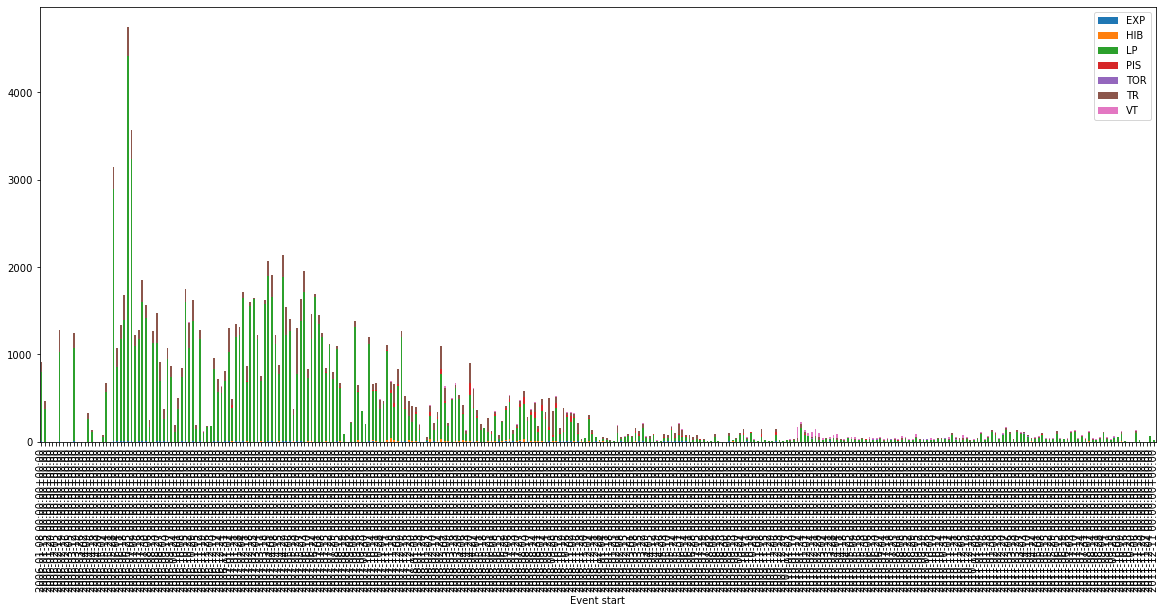

In [22]:
import matplotlib.pyplot as plt

dum.resample('W').sum().plot.bar(stacked=True, figsize=(20,8))

<AxesSubplot:xlabel='Event start'>

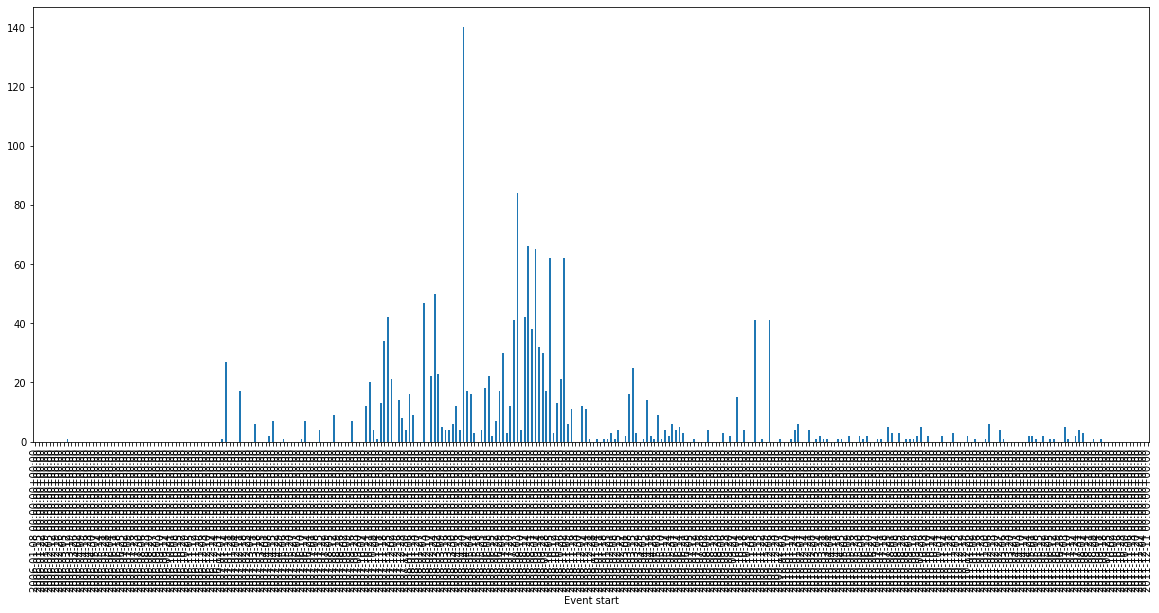

In [28]:
dum['PIS'].resample('W').sum().plot.bar(stacked=True,figsize=(20,8))

<AxesSubplot:xlabel='Event start'>

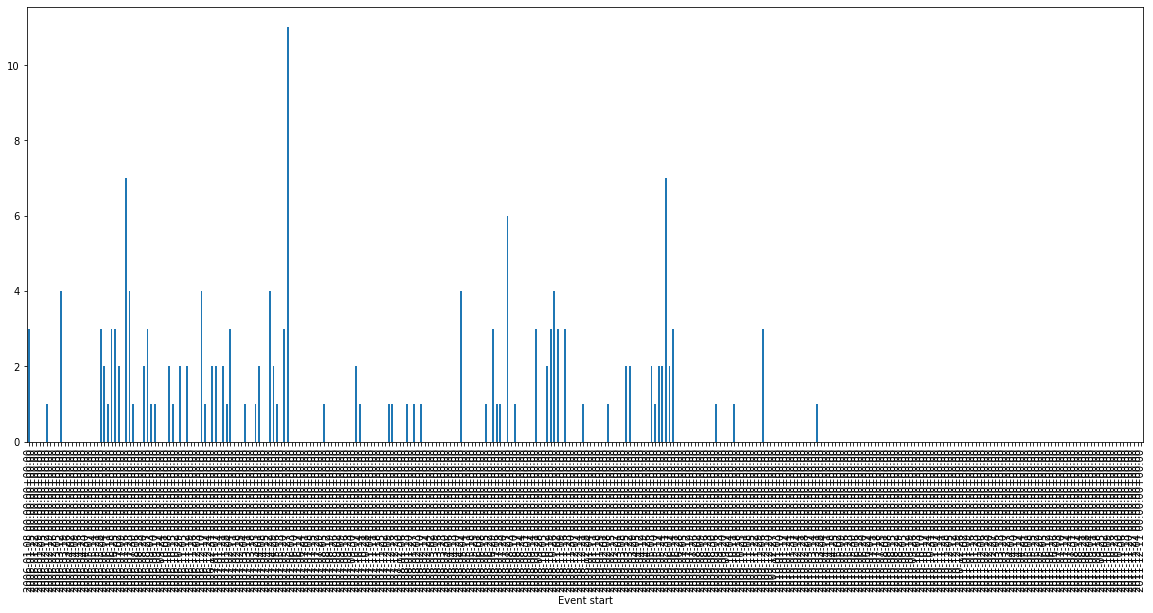

In [27]:
dum['EXP'].resample('W').sum().plot.bar(stacked=True,figsize=(20,8))